In [1]:
# calculo taxa de retorno simples

In [2]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#ações da
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1') 

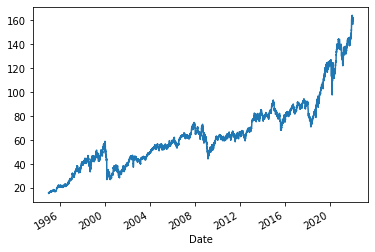

In [4]:
PG['Close'].plot();

In [5]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971125
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907220
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.795401
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.811378
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.779429


In [6]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-19,164.190002,156.970001,157.610001,162.000000,14088300.0,161.130005
2022-01-20,164.330002,160.119995,160.119995,162.000000,10799100.0,162.000000
2022-01-21,165.350006,162.100006,163.000000,162.619995,10899800.0,162.619995
2022-01-24,164.119995,158.720001,163.429993,161.300003,14846700.0,161.300003
2022-01-25,161.300003,157.884995,160.449997,159.539993,8807203.0,159.539993


In [7]:
# (close(1)/close(0))-1
# pct.change() metodo faz calculo
PG['Retorno-simples'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG

,High,Low,Open,Close,Volume,Adj Close,Retorno-simples
Date,,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.971125,NaN
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.907220,-0.008017
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.795401,-0.014141
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.811378,0.002049
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.779429,-0.004090
...,...,...,...,...,...,...,...
2022-01-19,164.190002,156.970001,157.610001,162.000000,14088300.0,161.130005,0.033625
2022-01-20,164.330002,160.119995,160.119995,162.000000,10799100.0,162.000000,0.005399
2022-01-21,165.350006,162.100006,163.000000,162.619995,10899800.0,162.619995,0.003827


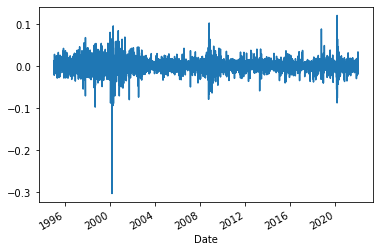

In [8]:
PG['Retorno-simples'].plot();

In [9]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

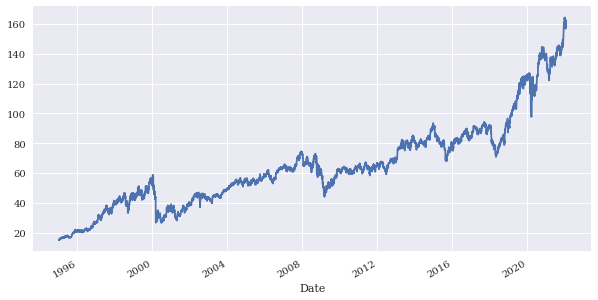

In [10]:
PG['Close'].plot(figsize=(10, 5));

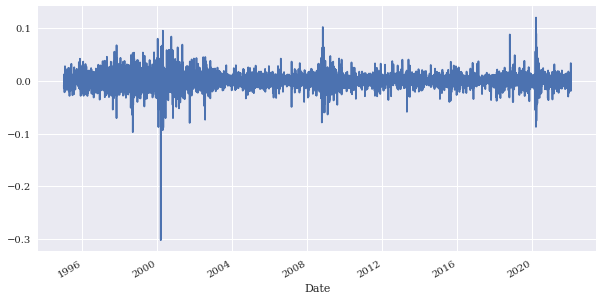

In [11]:
PG['Retorno-simples'].plot(figsize=(10, 5));

In [12]:
# média dos retornos diarios PG
avg_returns_d = PG['Retorno-simples'].mean()
avg_returns_d

0.000539914269840007

In [13]:
# média dos retornos anuais PG
avg_returns_a = PG['Retorno-simples'].mean() * 250 # média de dias de negociação
avg_returns_a

0.13497856746000175

In [15]:
print( str (round(avg_returns_a, 5) * 100) + ' %')

13.498 %


In [17]:
# retornos logaritmos 
PG['Retornos-log'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['Retornos-log']

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-01-19    0.033072
2022-01-20    0.005385
2022-01-21    0.003820
2022-01-24   -0.008150
2022-01-25   -0.010971
Name: Retornos-log, Length: 6815, dtype: float64

In [18]:
log_return_d = PG['Retornos-log'].mean()
log_return_d

0.00043975184021994933

In [19]:
log_return_a = PG['Retornos-log'].mean() * 250
log_return_a

0.10993796005498734

In [20]:
print( str (round(log_return_a, 5) * 100) + ' %')

10.994 %


In [21]:
# usar retorno simples quando estamos avaliando varias ações ao mesmo tempo
# usar retorno logaritmo quando estamos avaliando uma unica ação

In [23]:
# Calculando retorno de um portifólio

In [25]:
# lista com ticker das ações 
tickers = ['PG', 'MSFT', 'F', 'GE']
dados = pd.DataFrame()

for t in tickers:
    dados[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6815 entries, 1995-01-03 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6815 non-null   float64
 1   MSFT    6815 non-null   float64
 2   F       6815 non-null   float64
 3   GE      6815 non-null   float64
dtypes: float64(4)
memory usage: 266.2 KB


In [28]:
dados.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971119,2.374854,4.358237,32.877327
1995-01-04,7.907224,2.392117,4.475498,32.877327
1995-01-05,7.795403,2.352660,4.436409,32.957901
1995-01-06,7.811379,2.392117,4.436409,32.796730
1995-01-09,7.779427,2.377320,4.514589,32.474419


In [29]:
dados.tail()

,PG,MSFT,F,GE
Date,,,,
2022-01-19,161.130005,303.329987,22.450001,100.620003
2022-01-20,162.000000,301.600006,21.650000,98.250000
2022-01-21,162.619995,296.029999,20.650000,96.300003
2022-01-24,161.300003,296.369995,20.389999,96.910004
2022-01-25,159.539993,288.489990,19.980000,91.110001


In [31]:
dados.iloc[0]

PG       7.971119
MSFT     2.374854
F        4.358237
GE      32.877327
Name: 1995-01-03 00:00:00, dtype: float64

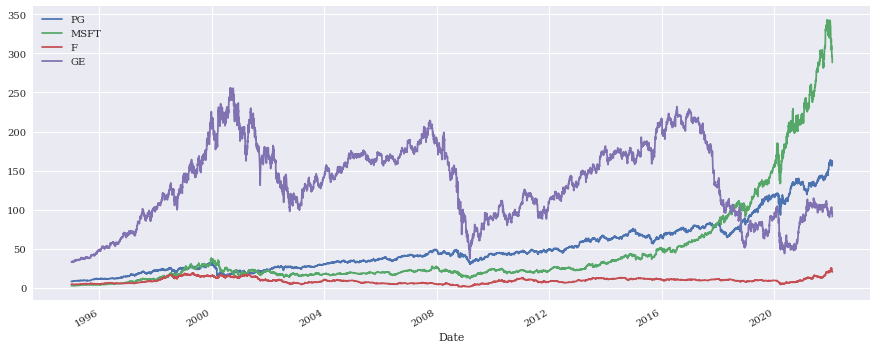

In [38]:
# plotagem sem normalizar
dados.plot(figsize=(15, 6));

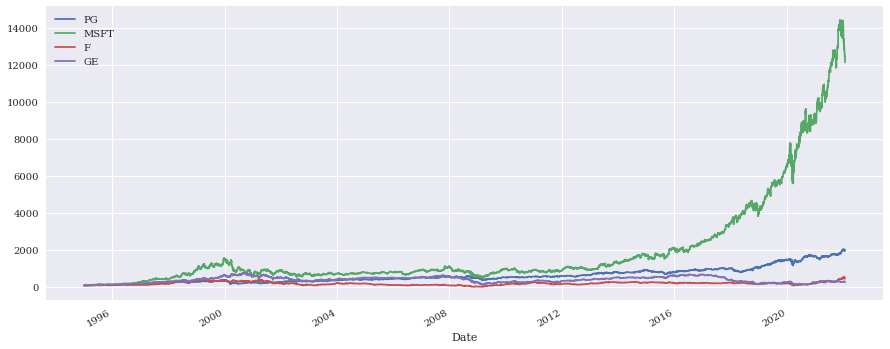

In [39]:
# normalização dos dados base 100
(dados / dados.iloc[0] * 100).plot(figsize=(15, 6));

In [42]:
dados.loc['1995-01-03'] # rótulo

PG       7.971119
MSFT     2.374854
F        4.358237
GE      32.877327
Name: 1995-01-03 00:00:00, dtype: float64

In [43]:
dados.iloc[0] # indice

PG       7.971119
MSFT     2.374854
F        4.358237
GE      32.877327
Name: 1995-01-03 00:00:00, dtype: float64

In [48]:
# calculando retorno do portifólio
retornos = (dados / dados.shift(1)) - 1

In [49]:
retornos.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [50]:
# lista com pesos 
pesos = np.array([0.25, 0.25, 0.25, 0.25])

In [51]:
# np.dot calcula o produto de um vetor o matriz - produto escalar
np.dot(retornos, pesos)


array([        nan,  0.00653965, -0.00922983, ..., -0.02016943,
       -0.00330624, -0.02936427])

In [52]:
anual_retornos = retornos.mean() * 250
anual_retornos

PG      0.134979
MSFT    0.225062
F       0.135963
GE      0.088705
dtype: float64

In [53]:
np.dot(anual_retornos, pesos)

0.14617736691799785

In [54]:
portifolio = str(round(np.dot(anual_retornos, pesos), 5) * 100) + '%'

In [59]:
portifolio

'14.618%'

In [56]:
# comparando com pesos de outra carteira
pesos_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [57]:
portifolio_2 = str(round(np.dot(anual_retornos, pesos_2), 5) * 100) + '%'

In [58]:
portifolio_2

'16.885%'

In [61]:
print(portifolio)
print(portifolio_2)

14.618%
16.885%


In [77]:
# indice de açoes 
indices = ['^GSPC', # S&P500
           '^IXIC', # NASDAQ
           '^GDAXI', # DAX alemanha
           '^BVSP', # BOVESP Brasil
           ]

In [78]:
dados_ind = pd.DataFrame()

for i in  indices:
    dados_ind[i] = wb.DataReader(i, data_source='yahoo', start='1997-1-1')['Adj Close']

In [82]:
dados_ind.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6955.500000
1997-01-03,748.030029,1310.680054,2863.260010,6997.799805
1997-01-06,747.650024,1316.400024,2890.199951,7159.500000
1997-01-07,753.229980,1327.729980,2876.340088,7159.500000
1997-01-08,748.409973,1320.349976,2904.080078,7427.000000


In [81]:
dados_ind.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-19,4532.759766,14340.259766,15809.719727,108013.000000
2022-01-20,4482.729980,14154.019531,15912.330078,109102.000000
2022-01-21,4397.939941,13768.919922,15603.879883,108805.000000
2022-01-24,4410.129883,13855.129883,15011.129883,107752.000000
2022-01-25,4356.450195,13539.294922,15123.870117,110203.773438


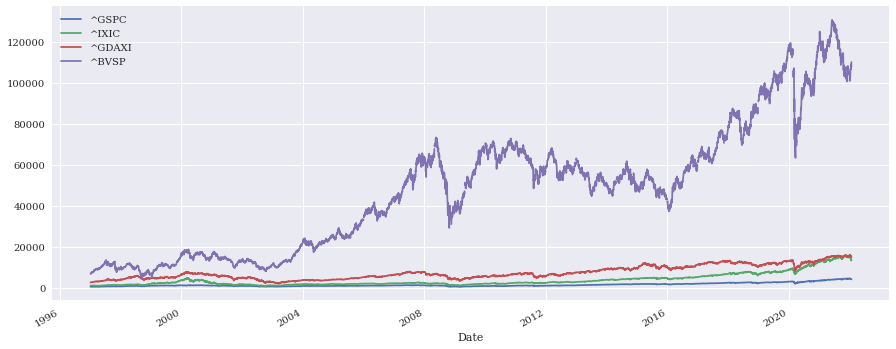

In [83]:
# plotagem sem normalizar 
dados_ind.plot(figsize=(15, 6));

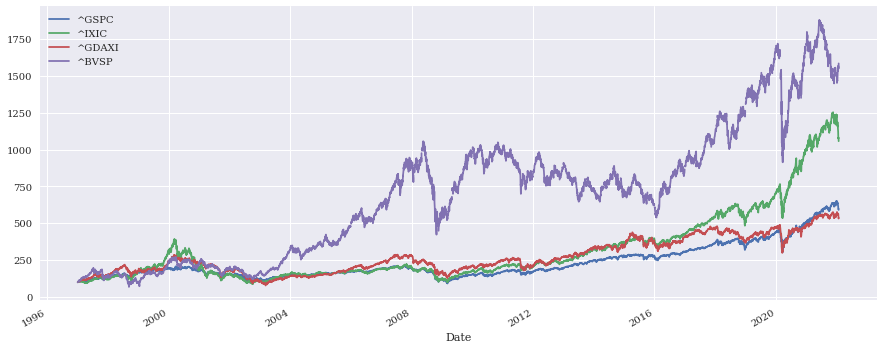

In [84]:
# normalização dos dados base 100
(dados_ind / dados_ind.iloc[0] * 100).plot(figsize=(15, 6));

In [85]:
indices_retornos = (dados_ind / dados_ind.shift(1)) - 1
indices_retornos.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-19,-0.009690,-0.011487,0.002356,0.013997
2022-01-20,-0.011037,-0.012987,0.006490,0.010082
2022-01-21,-0.018915,-0.027208,-0.019384,-0.002722
2022-01-24,0.002772,0.006261,-0.037987,-0.009678
2022-01-25,-0.012172,-0.022796,0.007510,0.022754


In [86]:
anual_indices_retornos = indices_retornos.mean() * 250
anual_indices_retornos

^GSPC     0.089400
^IXIC     0.124618
^GDAXI    0.078930
^BVSP     0.145441
dtype: float64

In [87]:
# comparação com o melhor indice/ação/indice com pesos iguais DJI
tickers_comp = ['PG', '^GSPC', '^DJI']

comp_precos = pd.DataFrame()

for t in tickers_comp:
    comp_precos[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [89]:
comp_precos.tail()

,PG,^GSPC,^DJI
Date,,,
2022-01-19,161.130005,4532.759766,35028.648438
2022-01-20,162.000000,4482.729980,34715.390625
2022-01-21,162.619995,4397.939941,34265.371094
2022-01-24,161.300003,4410.129883,34364.500000
2022-01-25,159.539993,4356.450195,34297.730469


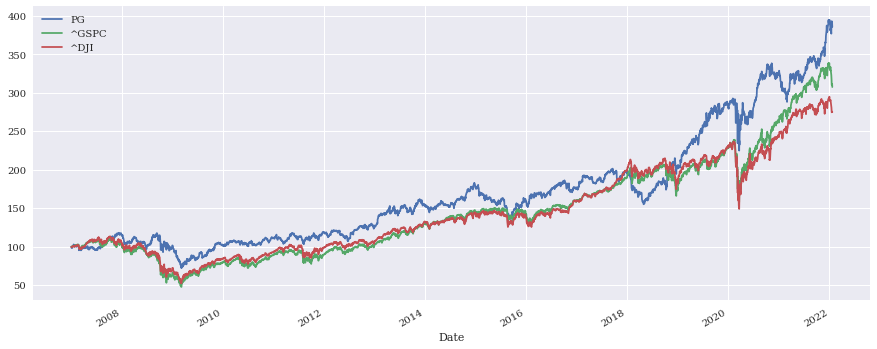

In [90]:
# normalização para ver performace durante um periodo
(comp_precos / comp_precos.iloc[0] * 100).plot(figsize=(15, 6))
plt.show() 